**Contexto**

El objetivo de este analisis es determinar el patron/variable que conlleva a los usuarios de la aerolinea  a estar o no satisfechos con el servicio recibido.  Se intentara responder las siguientes hipotesis/preguntas:
- El genero es una variable que influye en la satisfaccion del cliente?
- Las horas de vuelo tienen incidencia en la satisfaccion de cliente?
- La clase en la que vuelen sera un factor importante en la satisfaccion, a mejor clase mayor satisfacción?
- Existe un servicio que determine directamente la satisfacion o no del cliente?

 **Abstract:**

En el siguiente proyecto presentamos el dataset "Flights" con 23 variables y analiza mas de 100.000 viajeros aereos. Cuenta con variables de identificacion de los mismos como: el genero, que tipo de consumidor es (si cuenta con membresia Loyal o Disloyal), edad, motivo de viaje (viaje personal o por trabajo), el tipo de clase en la cual viajo (Eco, Eco Plus o Business) y la distancia del vuelo.
El mismo dataset tambien cuenta con una encuesta de satisfacción con puntajes del 0 al 5 en donde el viajero evalua los siguientes aspectos:
- Servicio de Wifi abordo
- Conveniencia del tiempo de arribo o partida del vuelo
- Facilidad al reservar de forma Online
- Ubicación de la puerta del vuelo
- Comida y bebida
- Abordaje del vuelo
- Comodidad del asiento
- Entretenimiento dentro del vuelo
- Servicio de abordaje al vuelo
- Espacio entre asientos (leg room)
- Manejo de equipaje
- Servicio de Check-in
- Servicio dentro del vuelo
- Limpieza

**Audiencia:** Aerolinea


# Nueva sección

**Analizar datos Tabulares**

- importamos liberias

In [ ]:
import pandas as pd #manipulacion de dataframe
import numpy as np #
import matplotlib.pyplot as plt #visualizaciones
import re # reemplazar espacios de las variables del dataset
import seaborn as sns #visualizaciones
import statsmodels.api as sm 
from sklearn import metrics # modulo para evaluar metricas del modelo
from sklearn.ensemble import RandomForestClassifier #Algoritmo para clasificacion
from sklearn.model_selection import train_test_split #separar datos para test y train
from sklearn.preprocessing import LabelEncoder # nos permite convertir las variables categorias a numeros, (Gender M/F a 0/1)


- Importamos el dataset directamente de Kaggle  (Es necesario tener en nuestra carpeta el token kaggle.json)

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction #ir a Kaggle y presionar en (...) luego Copy API command
!unzip /content/airline-passenger-satisfaction.zip #descomprimir archivo
df=pd.read_csv('train.csv') #Generamos el dataframe a partir del csv


-rw-r--r-- 1 root root 70 Dec 21 19:10 kaggle.json
/content
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 115MB/s]
Archive:  /content/airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


**Data Wrangling**

1.   Detección de valores nulos
2.   Detección de valores duplicados
3.   Manejo de datos faltantes



- Deteccion de valores nulos

In [ ]:
pd.set_option("display.max_rows",None)
df_nulos=df.isnull().sum().sort_values(ascending=False)
df_nulos[df_nulos>0] 

Arrival Delay in Minutes    310
dtype: int64

- Detección de valores duplicados

In [ ]:
df_dup=(df.duplicated() == True).sum()
df_dup

0

- Manejo de datos faltantes

Comenzamos eliminando las columnas que no son utiles para el analisis en cuestion, y convertimos las propiedades de los datos desde integer a variables categoricas. De los 310 datos nulos antes presentados de la variable " Arrival Delay in Minutes" se reemplazaran por su media correspondiente, siendo la misma de 15.1786.

Dado que no existen valores duplicados no se aplican cambios y se modifican los espacios en blanco de las variables por el caracter "_", concluyendo asi el manejo de datos faltantes para comenzar el analisis descriptivo.

In [ ]:
#df=df.drop(['Unnamed: 0','id'],axis=1) # Eliminar col Unnamed y id
l=[x for x in df.columns if x not in ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
df[l]=df[l].astype('category') #Convertir variables tipo int a category
avg_norm_loss = df['Arrival Delay in Minutes'].astype("float").mean(axis=0) #Imputacion de datos nulos ***
df['Arrival Delay in Minutes'].replace(np.nan, avg_norm_loss, inplace=True)

#Cambiamos los espacios de las variables del dataset por "_"
for i in df.columns: 
  a=re.sub(r"\s+","_",i)
  df.rename(columns={i:a},inplace=True) 


**Analisis Descriptivo y exploratorio**

- Analisis Descriptivo

In [ ]:
df.describe(include='all').T

- Analisis Exploratorio de datos (EDA)

*Analisis Univariado*
- V1 - Piechart: se plotea la distribución de las variables target ('satisfaction') y Genero

In [ ]:
df1=df['satisfaction'].value_counts()
df2=df['Gender'].value_counts()
plt.subplot(1,2,1)
df1.plot(kind='pie', title='Distribución - Satisfaction',figsize=(8,5),autopct='%.f%%',label='',colors=['pink','lightblue','red'])
plt.subplot(1,2,2)
df2.plot(kind='pie', title='Distribución - Gender ',figsize=(8,5),autopct='%.f%%',label='',colors=['pink','lightblue','red'])
plt.show()

*Analisis Bivariado*
- V2 - barplot: Se busca determinar si el genero tiene incidencia sobre la satisfaccion del usuario

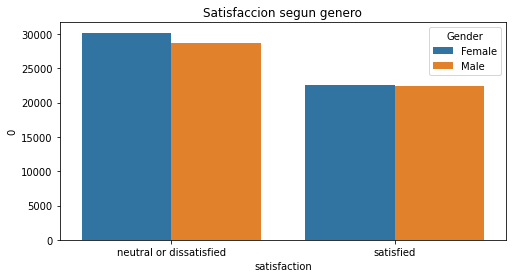

In [ ]:
df1=df[['Gender','satisfaction']].value_counts().reset_index()
fig,ax=plt.subplots(figsize=(8,4))
ax.set_title('Satisfaccion segun genero')
sns.barplot(data=df1,x='satisfaction',y=0,hue='Gender')
plt.show()

- V3 - Boxplot: Se busca determinar si el tiempo de vuelo tienen incidencia en la satisfacion del usuario

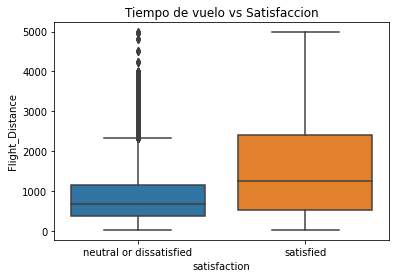

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(data=df,y='Flight_Distance',x='satisfaction')
ax.set_title('Tiempo de vuelo vs Satisfaccion')
plt.show()

- V4 - barplot: Se busca determinar si la variable Class tiene incidencia sobre la satisfaccion del usuario

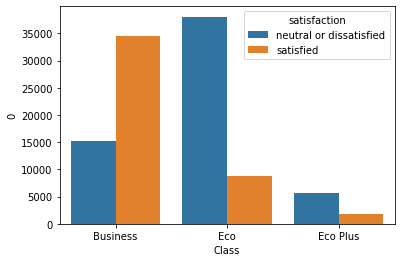

In [ ]:
df1=df[['Class','satisfaction']].value_counts().reset_index()
sns.barplot(data=df1,x='Class',y=0,hue='satisfaction')
plt.show()

**Conclusiones**
- V1: La distribucion de la variable target "satisfaction" esta balanceado (Insatisfechos o Neutro 57%, Satisfechos 43%)
- V1: La distribucion de la variable "Gender" esta balanceada (51% Hombres, 49% mujeres)
- V2: No se observa incidencia del sexo sobre satisfaccion del cliente.
- V3: Se observa que a mayor tiempo de vuelo, el usuario suele estar mas satisfecho con el servicio.
- V4: Se observa una clara incidencia de la variable "Class" sobre la satisfaccion del usuario. Usuarios que viajan en clase "Business" suelen estar mayormente satisfechos, por el contrario los usuarios que viajen en clase "Eco class" suelen estar mayormente insatisfechos o neutro. 


**3. Modelos de Machine Learning**

- Generamos un dataframe con variables de tipo categoricas y luego mediante el uso del modulo LabelEncoder, convertimos las variables categoricas a numericas

In [ ]:
df_categorico = df.select_dtypes(include = 'category')
le=LabelEncoder()
for col in df_categorico.columns:
    df[col] = le.fit_transform(df[col])

- Dividimos el dataframe en dos, Varible Target 'y' (Serie) y variables explicativas 'X' (Dataframe)

In [ ]:
#Separamos la variable target y variables explicativas
X=df.drop('satisfaction',axis=1) # 22 columnas
y=df['satisfaction'] # Variable Target

- Mediante el uso del metodo Backward Elimination, realizamos feature selection (disminuir dimensionalidad del df)

In [ ]:
#Funcion Feature Selection Backward Elimination
def backward_elimination(data, target,significance_level = 0.05): # significance = 0.0001 elimina 3 columnas
    features = data.columns.tolist()
    
    while(len(features)>0): 
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level): #max_p_value: 0.0008
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features
#Se llama la funcion de feature Selection
backward_elimination(X,y) #Nos treae 22 columnas, no elimina ninguna

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

Aun manteniendo un nivel de significacion bajo, el modelo no rechaza estadisticamente ninguna de las variables por lo que cual mantuvimos un modelo de 22 variables explicativas para explicar el nivel de satisfacción del viajero. Aunque no negamos tener problemas de multicolinealidad entre las variables por las homogeneidad de las mismas.

- Vamos a separar los conjuntos X,y en 4 subconjuntos: X_train, X_test, y_train, y_test

In [ ]:
#Dividir datos para train y para test
from sklearn.model_selection import train_test_split
# Separamos en entrenamiento/test en razon 80/20% (train/test%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

- Algoritmo Clasificacion (RandomForestClassifier)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

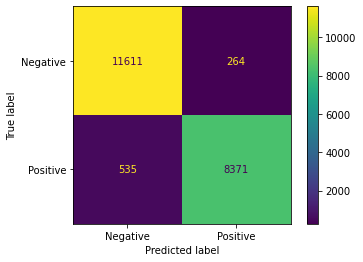

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
preds=modelo.predict(X_test)
preds
#plt.figure(figsize=(10,6))
#metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

El algoritmo explica correctamente 11.614 verdaderos negativos y 8.378 verdaderos positivos. Con solo 789 falsos negativos y positivos respectivamente.

El modelo predice correctamente el 96% de los casos de estudio, por lo cual es un muy buen modelo para predecir en base a los atributos de los coeficientes la satisfaccion o falta de ella del viaje en avion.
Nuestras futuras intenciones son en base a clustering caracterizar a los viajeros para determinar si, en base a las decisiones que tomen y caracteristicas innatas de los mismos, si se va a sentir conforme o no con el viaje ofrecido.

In [ ]:
acurracy=metrics.accuracy_score(y_test,preds)
acurracy